In [4]:
import pandas as pd

file_name = 'bank-full.csv'
data = pd.read_csv(file_name)

# Display the first few rows
print(data.head())

# Reload the dataset specifying the separator
data = pd.read_csv(file_name, sep=';')

# Display the first few rows to confirm splitting
print(data.head())

# Check the column names
print(data.columns)

# Save the formatted dataset to a new CSV file
formatted_file_name = 'bank_marketing_formatted.csv'
data.to_csv(formatted_file_name, index=False)

# Download the file
from google.colab import files
files.download(formatted_file_name)

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  
   age           job  marital  education default  balance housing loan  \
0   58    management

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Load the formatted dataset
data = pd.read_csv('bank_marketing_formatted.csv')

# Display the first few rows
print(data.head())

# Check data information
print(data.info())

# Check basic statistics for numerical columns
print(data.describe())

# Check the class distribution of the target variable
print(data['y'].value_counts())  #Target column = 'y'

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [6]:
import pandas as pd

# Load the formatted dataset
data = pd.read_csv('bank_marketing_formatted.csv')

# Separate numerical and categorical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode the target variable 'y' (yes -> 1, no -> 0)
if 'y' in data.columns:
    data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Encode categorical columns (one-hot encoding for simplicity)
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handle outliers using the IQR method
Q1 = data_encoded[numerical_cols].quantile(0.25)
Q3 = data_encoded[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the conditions for identifying outliers
outliers_condition = ((data_encoded[numerical_cols] < (Q1 - 1.5 * IQR)) |
                      (data_encoded[numerical_cols] > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
data_encoded = data_encoded[~outliers_condition.any(axis=1)]

# Save the preprocessed data to a CSV file
output_file = 'preprocessed_data.csv'
data_encoded.to_csv(output_file, index=False)

# Print confirmation message
print(f"Preprocessed data with outliers removed has been saved to {output_file}.")

Preprocessed data with outliers removed has been saved to preprocessed_data.csv.


In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

# Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)

# Train the Neural Network model
nn_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
nn_predictions = nn_model.predict(X_test)

# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_classification_report = classification_report(y_test, nn_predictions)
nn_confusion_matrix = confusion_matrix(y_test, nn_predictions)

# Print Neural Network results
print("Neural Network Performance:")
print(f"Accuracy: {nn_accuracy:.4f}")
print("Classification Report:")
print(nn_classification_report)
print("Confusion Matrix:")
print(nn_confusion_matrix)

Neural Network Performance:
Accuracy: 0.8918
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5331
           1       0.27      0.56      0.36       308

    accuracy                           0.89      5639
   macro avg       0.62      0.73      0.65      5639
weighted avg       0.93      0.89      0.91      5639

Confusion Matrix:
[[4858  473]
 [ 137  171]]


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Print Random Forest results
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_classification_report)
print("Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Performance:
Accuracy: 0.9448
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5331
           1       0.49      0.27      0.35       308

    accuracy                           0.94      5639
   macro avg       0.72      0.63      0.66      5639
weighted avg       0.93      0.94      0.94      5639

Confusion Matrix:
[[5245   86]
 [ 225   83]]


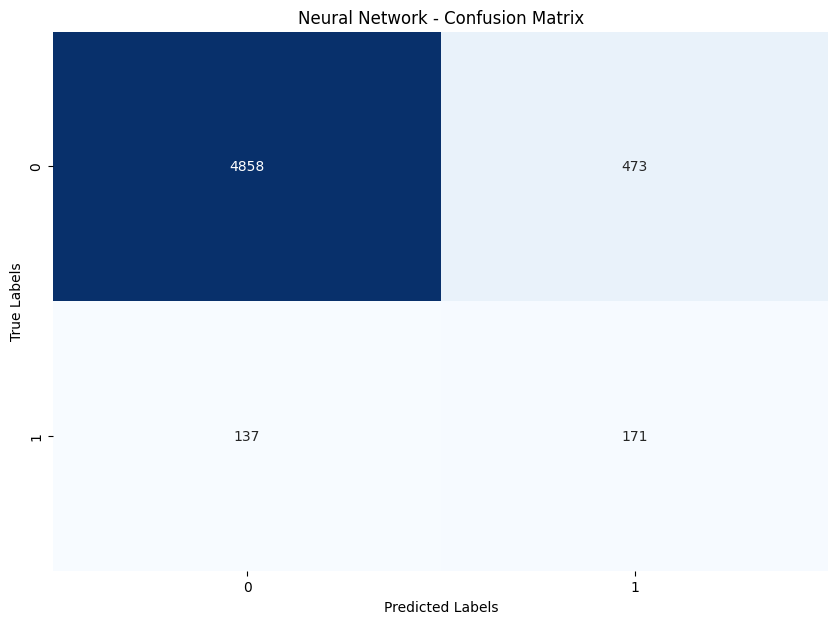

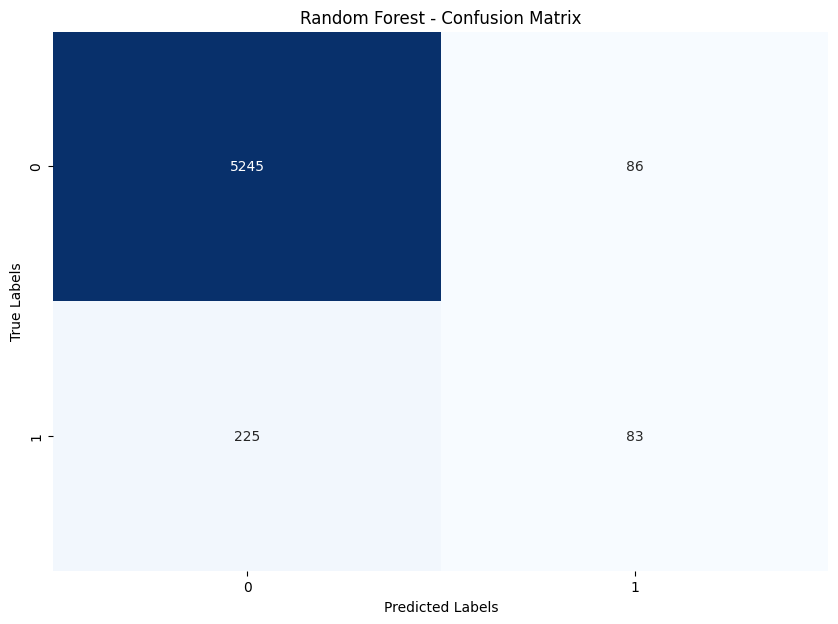

<ipython-input-10-1b76dfca1865>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


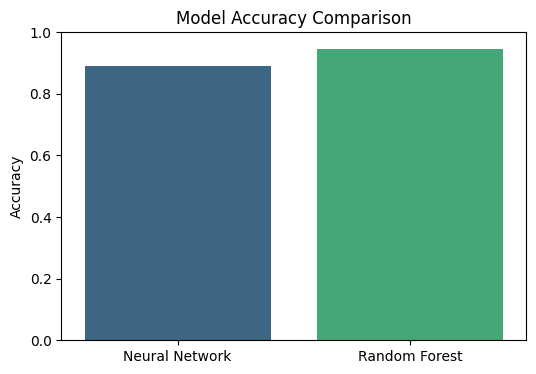

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix for Neural Network
plt.figure(figsize=(10, 7))
sns.heatmap(nn_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Neural Network - Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Random Forest - Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the accuracy of both models for comparison
models = ['Neural Network', 'Random Forest']
accuracies = [nn_accuracy, rf_accuracy]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
